# Druga domača naloga

Začnemo z uvozom in analizo podatkov

In [390]:
# uvozimo knjižnice
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler


In [391]:
# uvoz podatkov
podatki_train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
podatki_test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

print(f"Oblika učne množice:\n{podatki_train.shape}\n")
print(f"Oblika testne množice:\n{podatki_test.shape}\n")

Oblika učne množice:
(1460, 81)

Oblika testne množice:
(1459, 80)



In [392]:
train_ID = podatki_train['Id']
test_ID = podatki_test['Id']

podatki_train.drop('Id', axis=1, inplace=True)
podatki_test.drop('Id', axis=1, inplace=True)

podatki_train.info()
podatki_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [393]:
# podrobnejši ogled napovedne spremenljivke
print(podatki_train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Skewness: 1.882876
Kurtosis: 6.536282


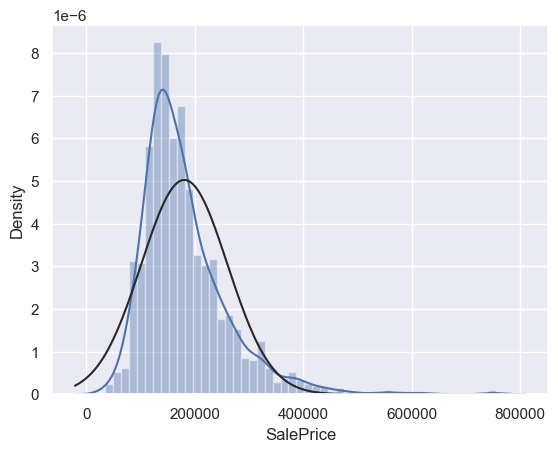

In [394]:
sns.distplot(podatki_train['SalePrice'], fit=norm)

print("Skewness: %f" % podatki_train['SalePrice'].skew())
print("Kurtosis: %f" % podatki_train['SalePrice'].kurt())

In [395]:
# ogled numeričnih atributov
podatki_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [396]:
train_num = podatki_train.select_dtypes(include = ['float64', 'int64'])
train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


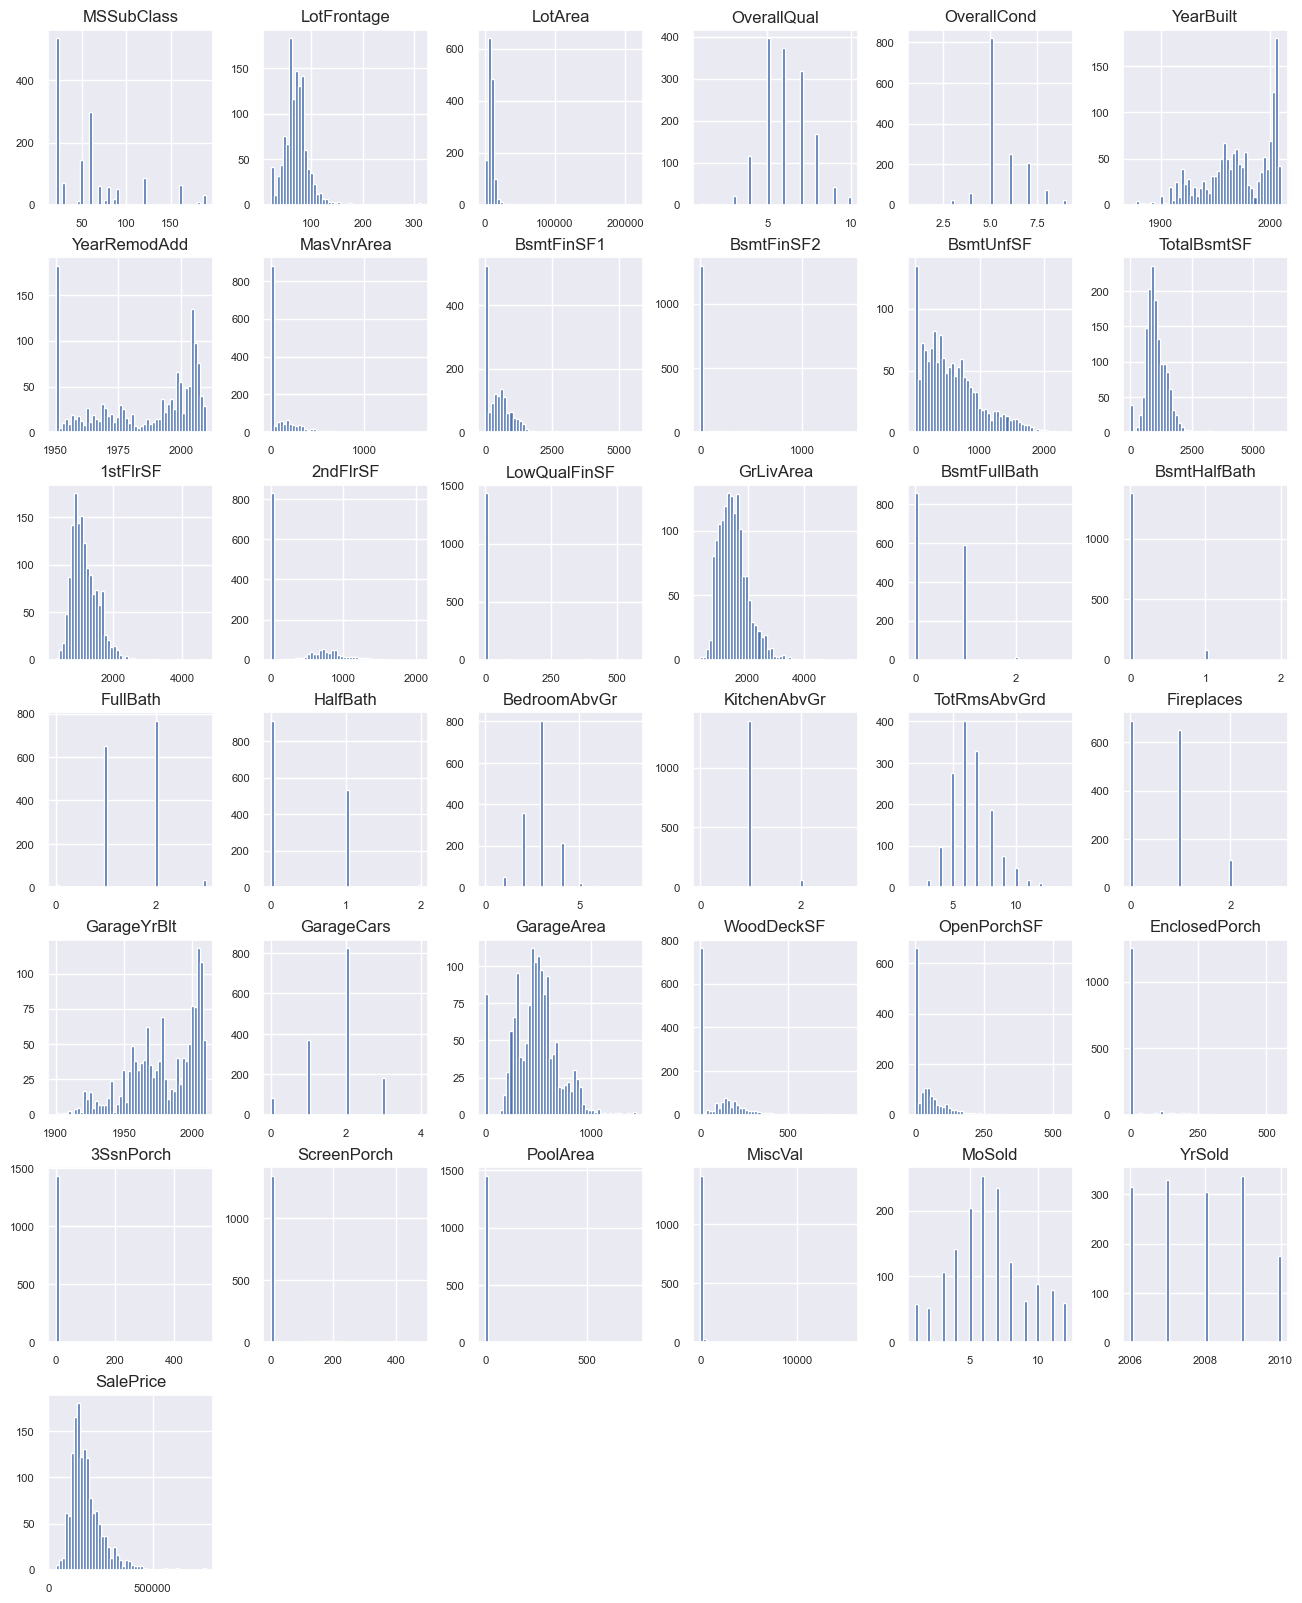

In [397]:
# grafični prikaz vrednosti atributov
histogrami = train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

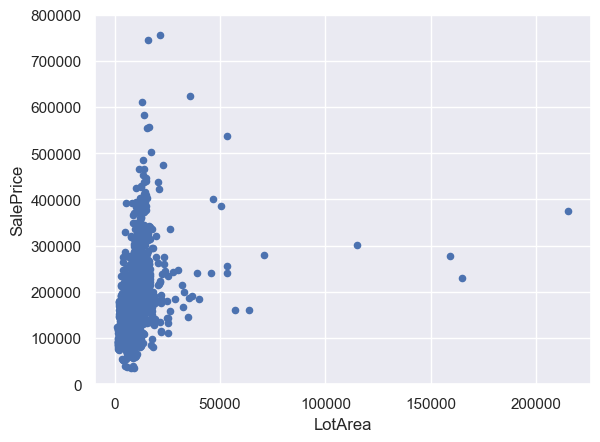

In [398]:
#Primerjava atributov s ceno
var = 'LotArea'
data = pd.concat([train_num['SalePrice'], train_num[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

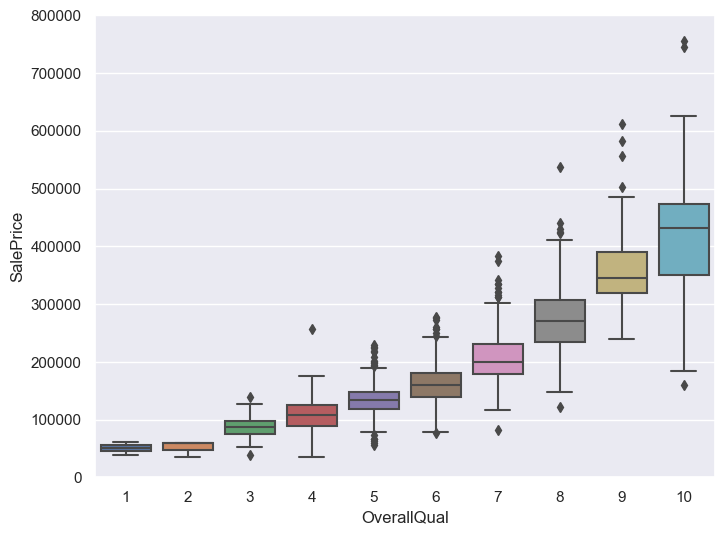

In [399]:
var = 'OverallQual'
data = pd.concat([train_num['SalePrice'], train_num[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

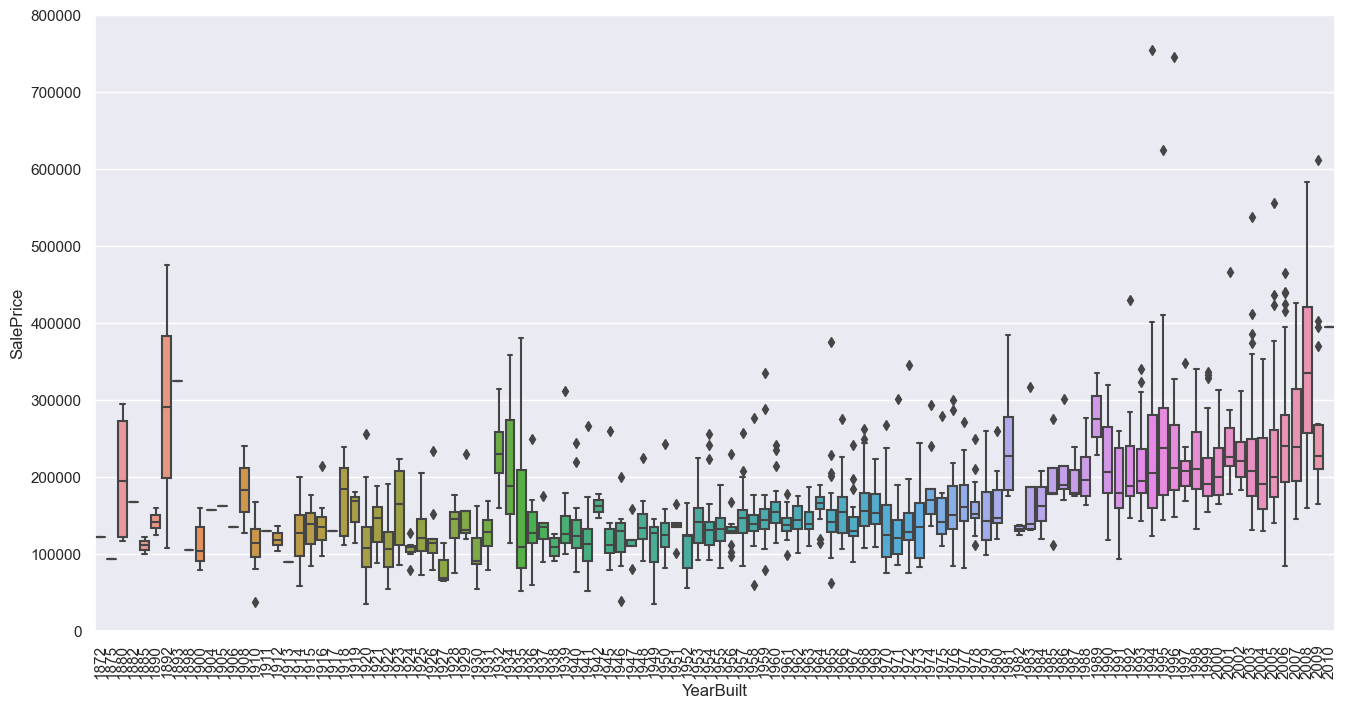

In [400]:
var = 'YearBuilt'
data = pd.concat([train_num['SalePrice'], train_num[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## Priprava atributov

<Axes: >

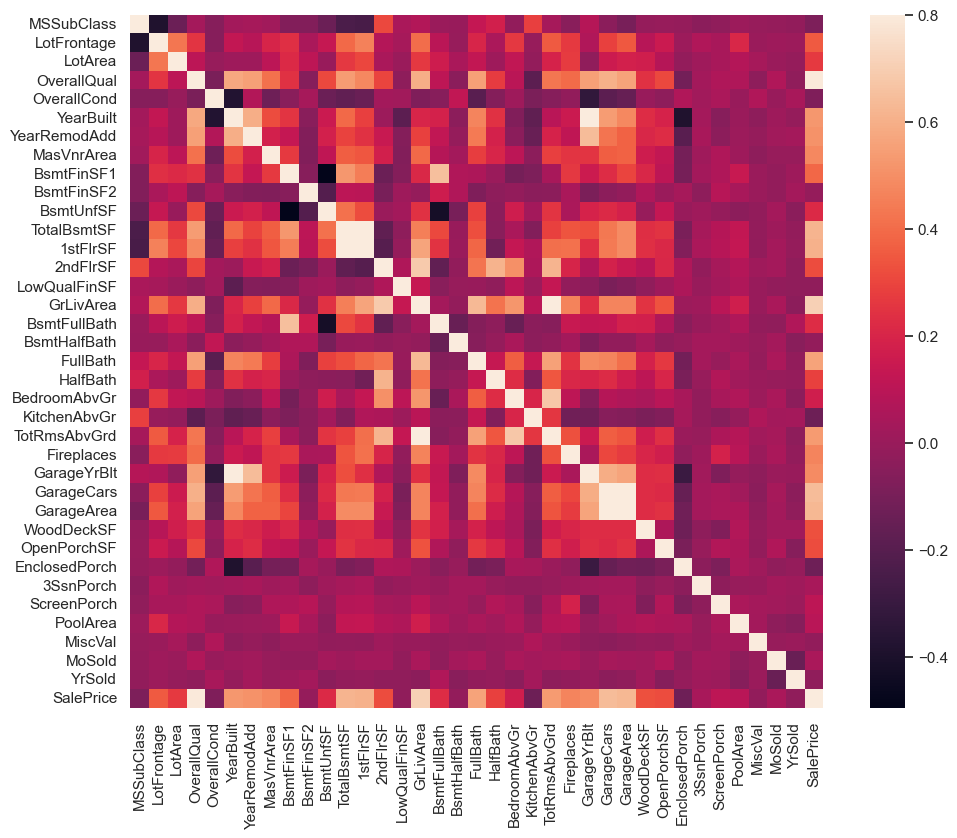

In [401]:
# korelacijska matrika
corr_matrix = train_num.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=0.8, square=True)

Med nekaterimi atributi je prisotna močna koleracija, zelo verjetno bo v nadaljevanju potrebno reševati problem multikolinearnosti. Za začetek si poglejmo 10 atributov, ki so najpomembnejši pri napovedovanju cene.

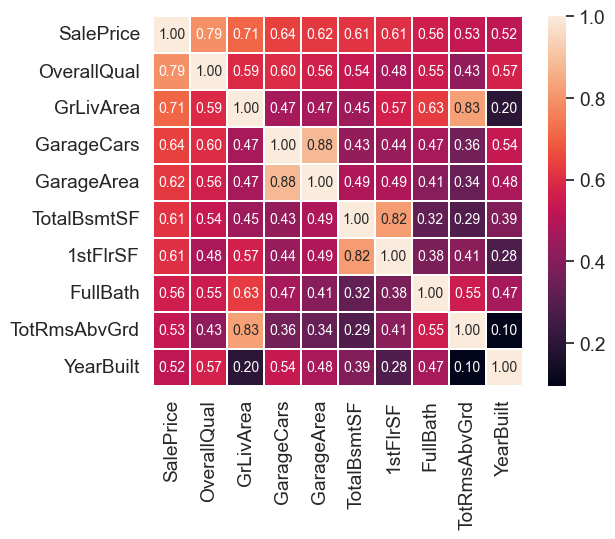

In [402]:
k = 10 #top 10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_num[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', linewidths=0.1, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Opazimo močno korelacijo med spremenljivkami 'TotRmsAbvGrd' in 'GrLivArea', 'TotalBsmtSF' in '1stFlrSF' ter med 'GarageCars' in 'GarageArea'. Najbolje, da izločimo po eno iz vsakega para.

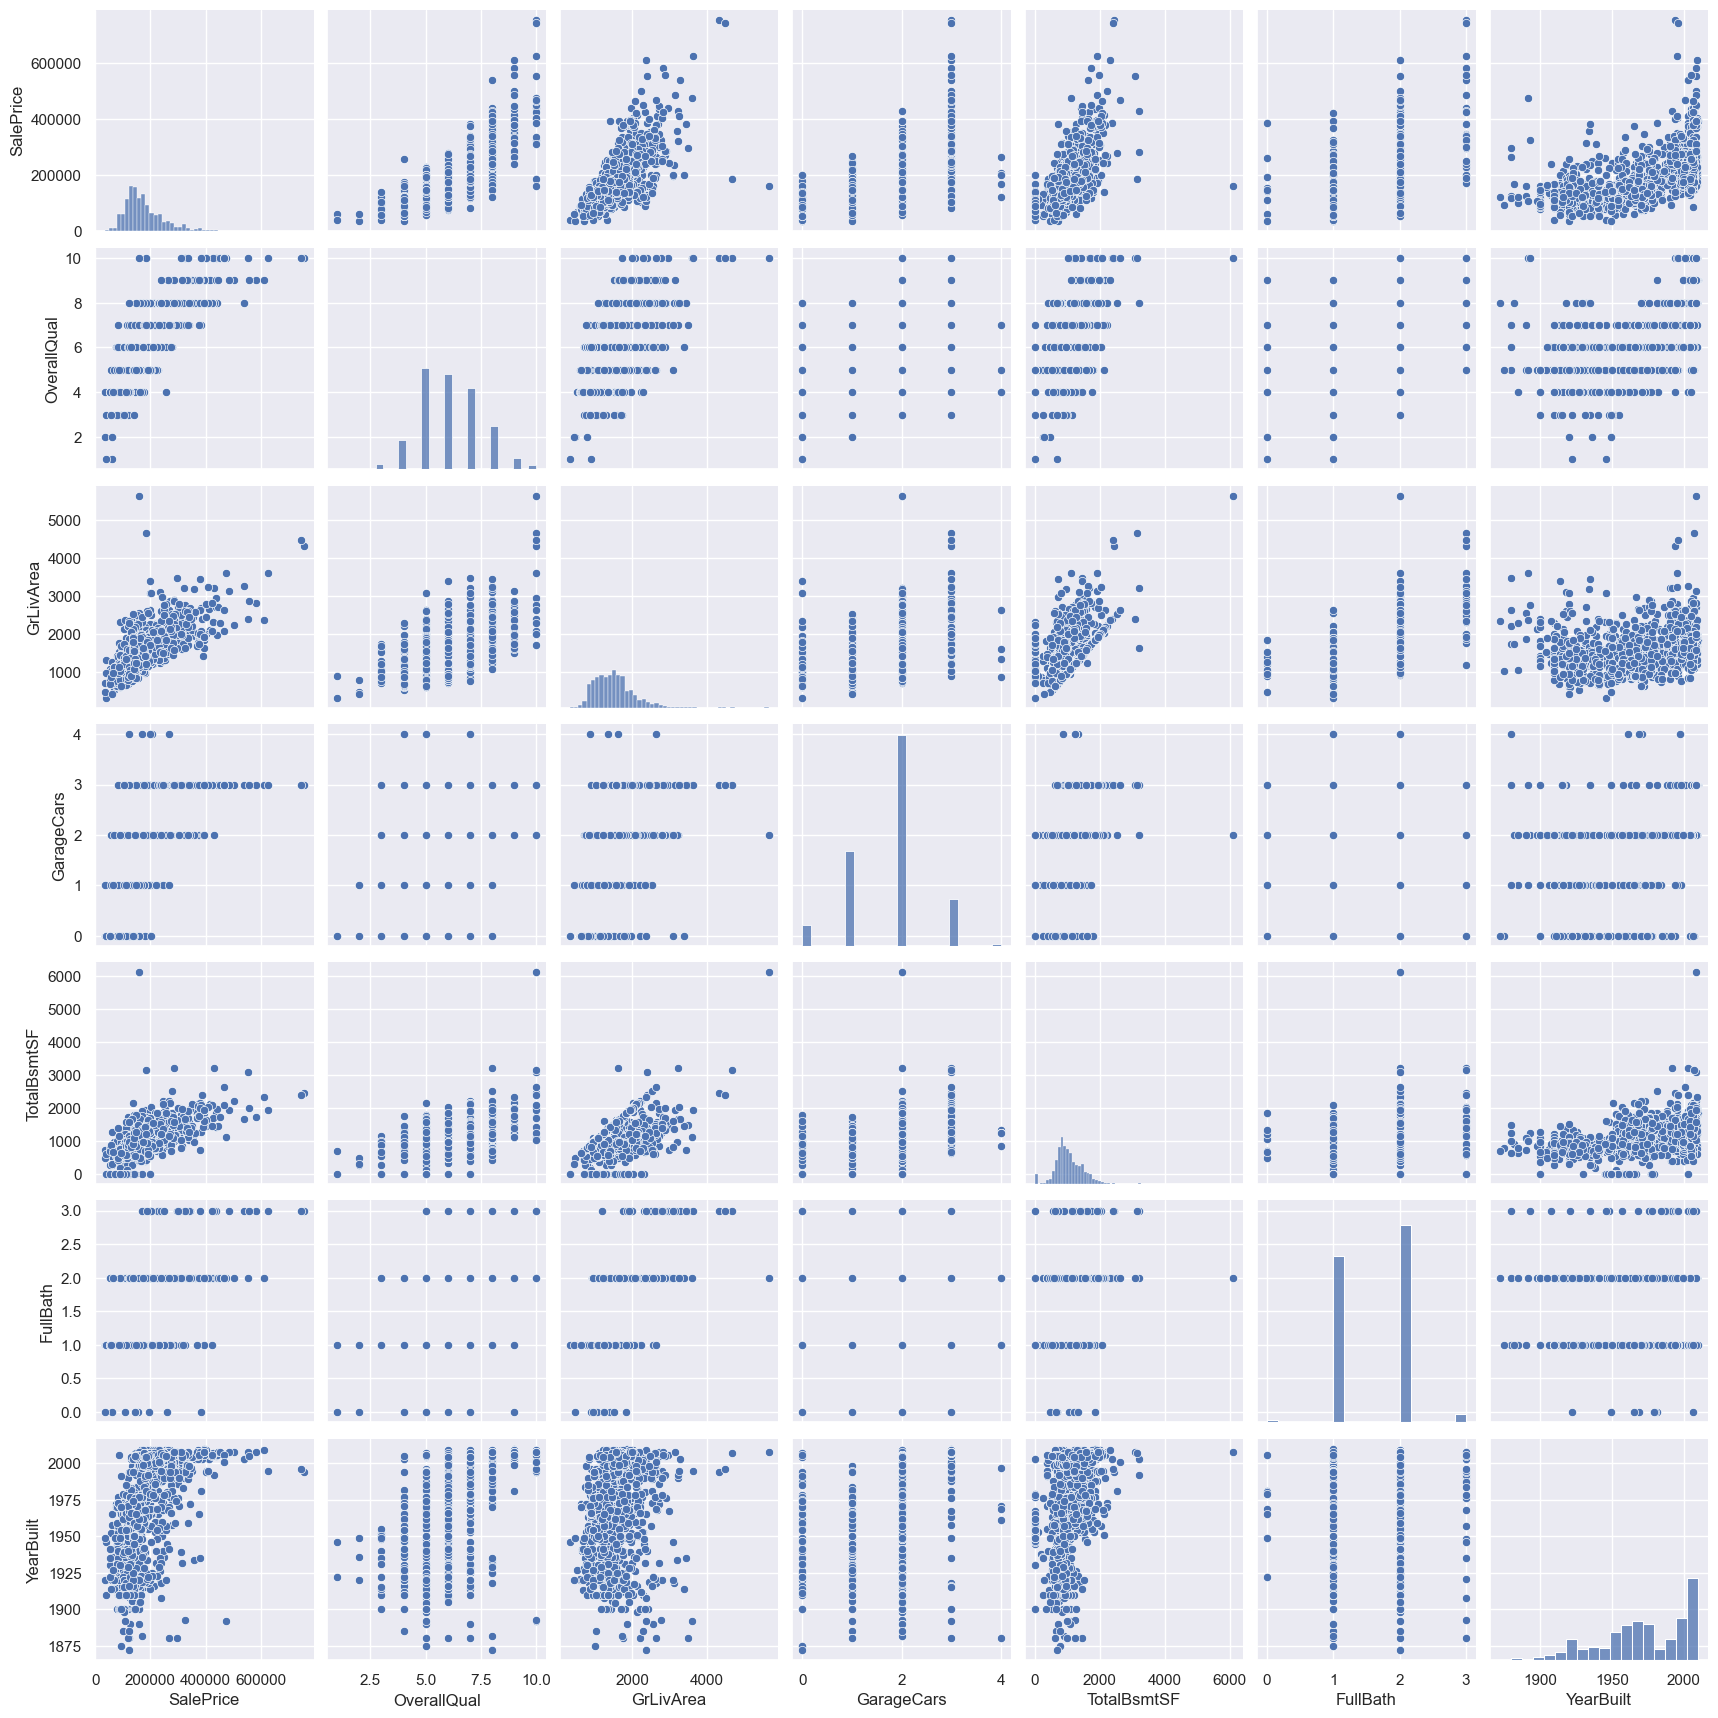

In [403]:
sns.set() 
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_num[cols], size = 2.5)
plt.show()

V korelaciji atributov 'GrLivArea' in 'TotalBsmtSF' z napovedno spremenljivko vidimo nekaj vrednosti, ki odstopajo od trenda, zato te odstranimo.

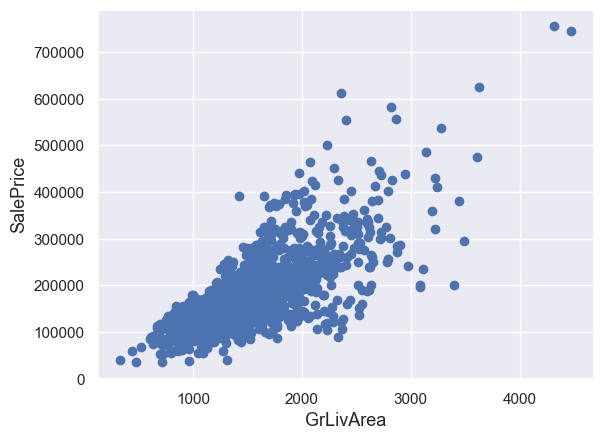

In [404]:
podatki_train = podatki_train.drop(podatki_train[(podatki_train['GrLivArea']>4000) & (podatki_train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(x = podatki_train['GrLivArea'], y = podatki_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

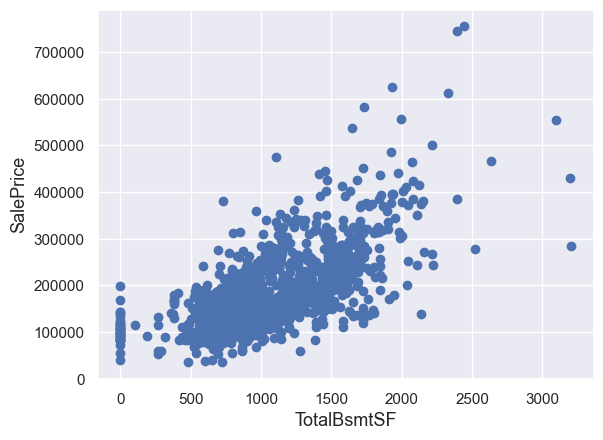

In [405]:
#podatki_train = podatki_train.drop(podatki_train[(podatki_train['TotalBsmtSF']>4000) & (podatki_train['SalePrice']<200000)].index)
# sovpada z indeksom ki smo ga že zgoraj odstranili

fig, ax = plt.subplots()
ax.scatter(x = podatki_train['TotalBsmtSF'], y = podatki_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

In [406]:
n_train = podatki_train.shape[0]
n_test = podatki_test.shape[0]

y_train = pd.DataFrame(podatki_train['SalePrice'])

# združimo učno in testno množico v en dataframe:
all_data = pd.concat((podatki_train, podatki_test)).reset_index(drop=True)
all_data.drop('SalePrice', axis=1, inplace=True)
print(f"Oblika celotnega setta:\n{all_data.shape}\n")

Oblika celotnega setta:
(2917, 79)



In [407]:
#Odstranimo stoplce, da ne pride do multikolinearnosti
all_data = all_data.drop(['TotRmsAbvGrd', '1stFlrSF', 'GarageArea'], axis=1)

Poglejmo, če imamo v podatkih manjkajoče vrednosti.

In [408]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageYrBlt,159,5.450806
GarageFinish,159,5.450806
GarageQual,159,5.450806
GarageCond,159,5.450806


Text(0, 0.5, 'Atribut\n')

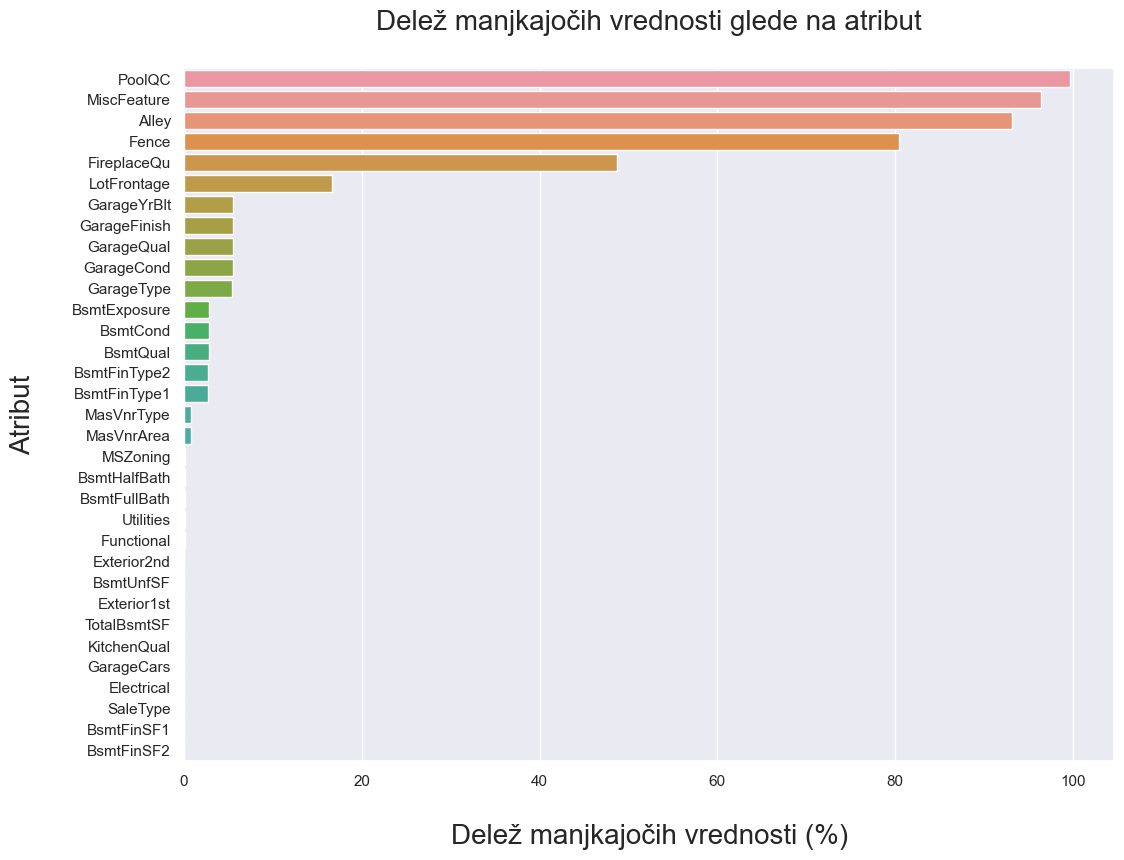

In [409]:
missing_data_p = missing_data[missing_data.Percent > 0]

index = missing_data_p.index
seznam_vrstic = list(index)

f, ax = plt.subplots(figsize=(12, 9))
p = sns.barplot(x="Percent", y=seznam_vrstic, data=missing_data_p)

p.set_title("Delež manjkajočih vrednosti glede na atribut\n", fontsize=20)
p.set_xlabel("\nDelež manjkajočih vrednosti (%)", fontsize=20)
p.set_ylabel("Atribut\n", fontsize=20)

Začnemo z imputacijo manjkajočih vrednosti. Nekatere lahko logično nadomestimo če se poslužimo dokumentacije. Drugje poskusimo z mediano ali povprečjem. Če se nam atribut zdi neuporaben ga pa odstranimo.

In [410]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None") # NA pomeni ni bazena
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None") # ni drugih posebnosti
all_data["Alley"] = all_data["Alley"].fillna("None") # ni dostopa na ulico
all_data["Fence"] = all_data["Fence"].fillna("None") # ni ograje
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None") # ni kamina

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))  # medianska vrednost glede na ulico v kateri se nahaja

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None') # ni garaže

for col in ('GarageYrBlt', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0) # ni garaže, torej lahko vanjo damo 0 avtomobilov

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0) # ni kleti

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None') # ni kleti

all_data["Functional"] = all_data["Functional"].fillna("Typ") # če ni podano sklepamo, da je tipična

#zamenjamo z najpogostejšimi vrednostmi
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0]) 
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0]) 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0]) 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

# te stolpce odstranimo
all_data = all_data.drop(['Utilities', 'MasVnrType', 'MasVnrArea'], axis=1)

In [411]:
all_data.isnull().sum().max() 

0

In [412]:
print(f"Oblika celotnega setta:\n{all_data.shape}\n")

Oblika celotnega setta:
(2917, 73)



Pogljemo si še kategorične spremenljivke

In [413]:
categorical_features = [
    i for i in all_data.columns if all_data.dtypes[i] == "object"]

categ_data = all_data[categorical_features]

#print(categ_data)

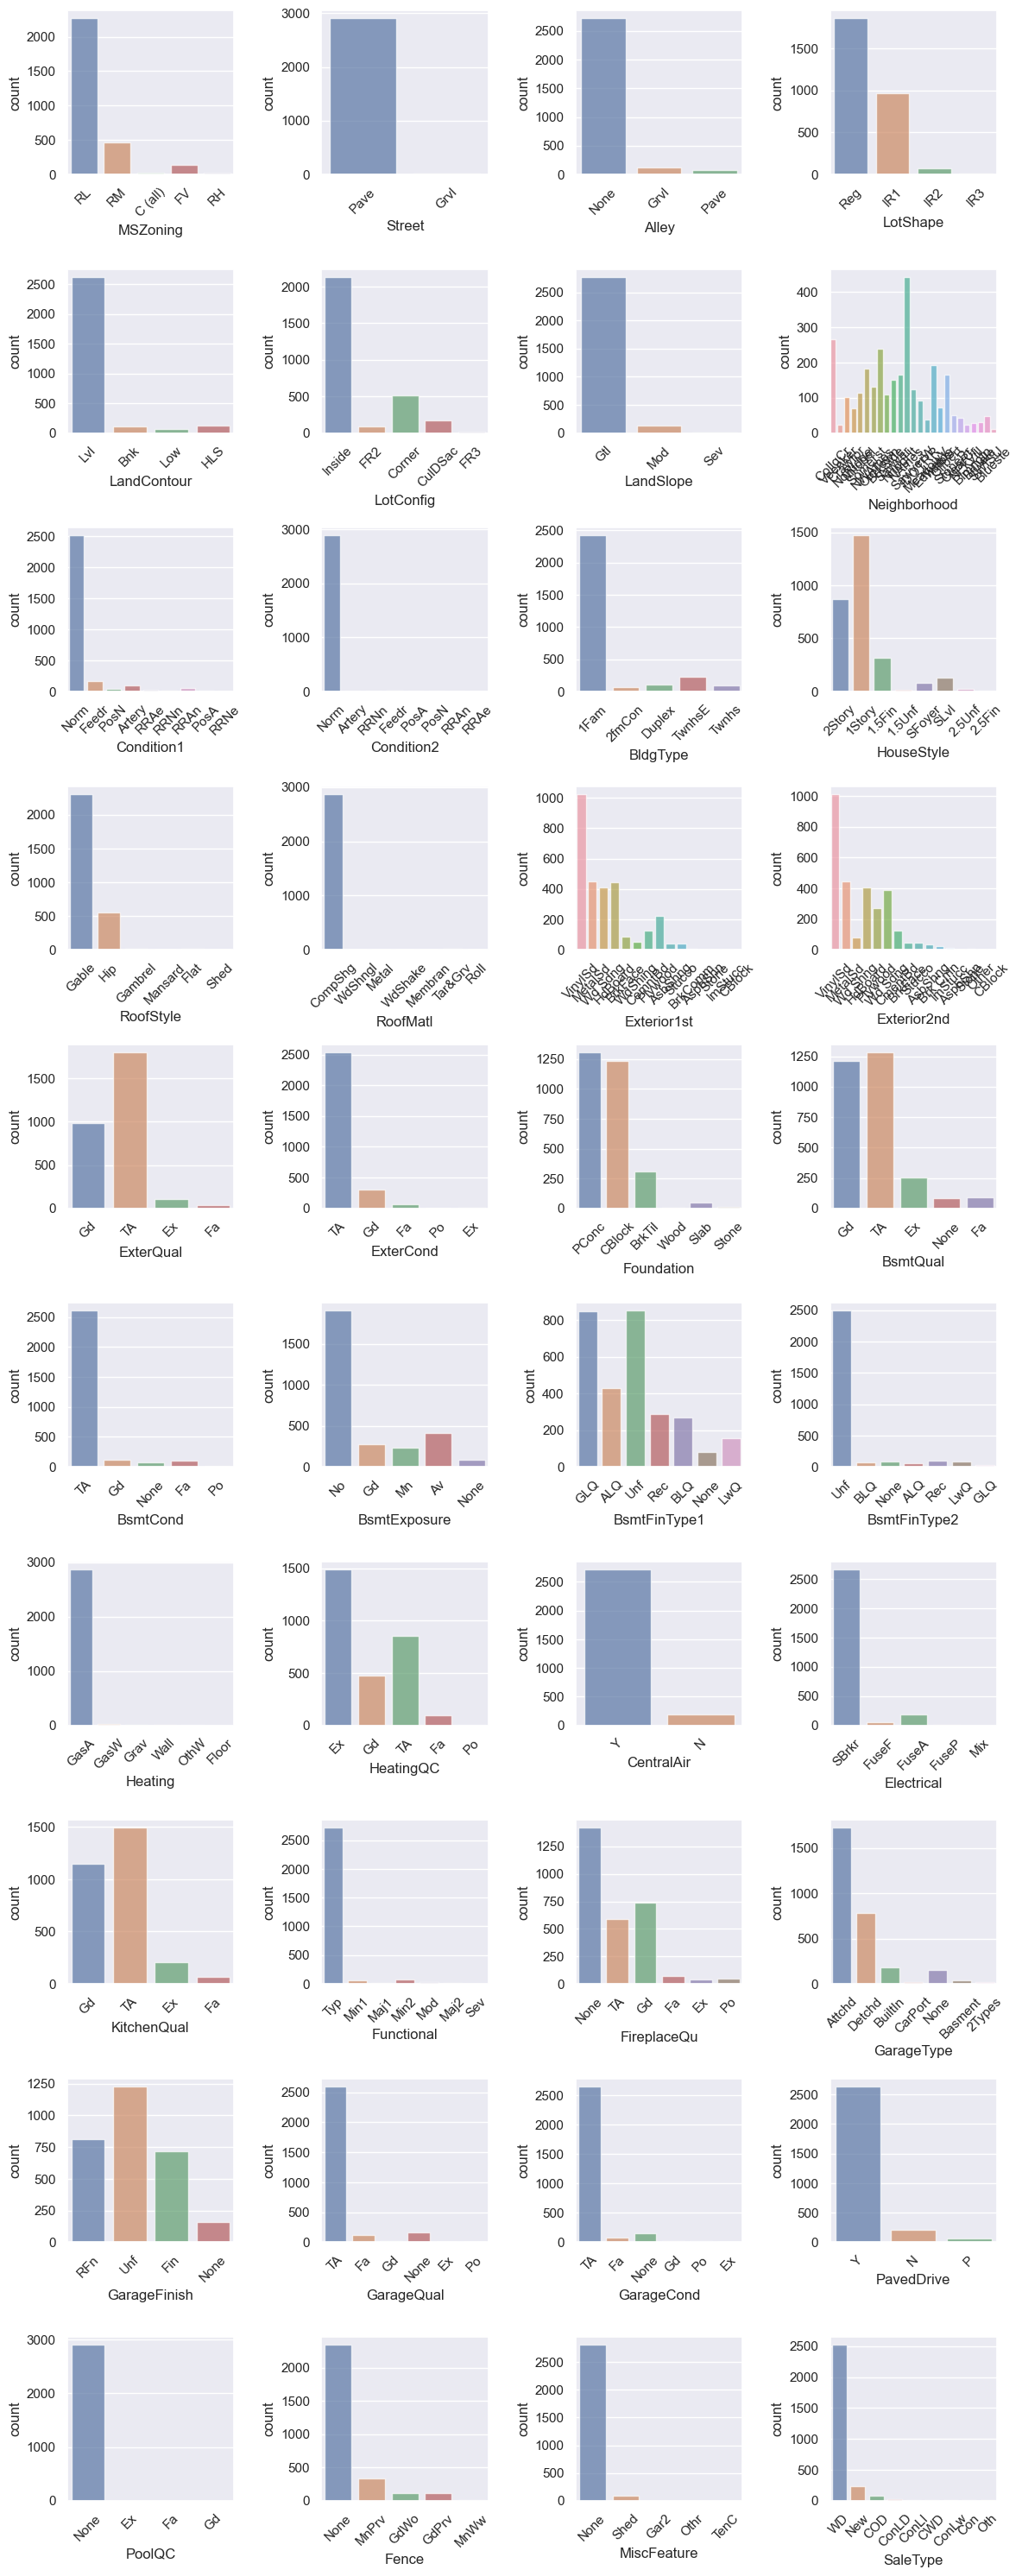

In [414]:
fig, axes = plt.subplots(
    round(len(categ_data.columns) / 4), 4, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    
    if i < len(categ_data.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=categ_data.columns[i], alpha=0.7, data=categ_data, ax=ax)

fig.tight_layout()

In [415]:
from collections import Counter
Counter(all_data['Street'])

Counter({'Pave': 2905, 'Grvl': 12})

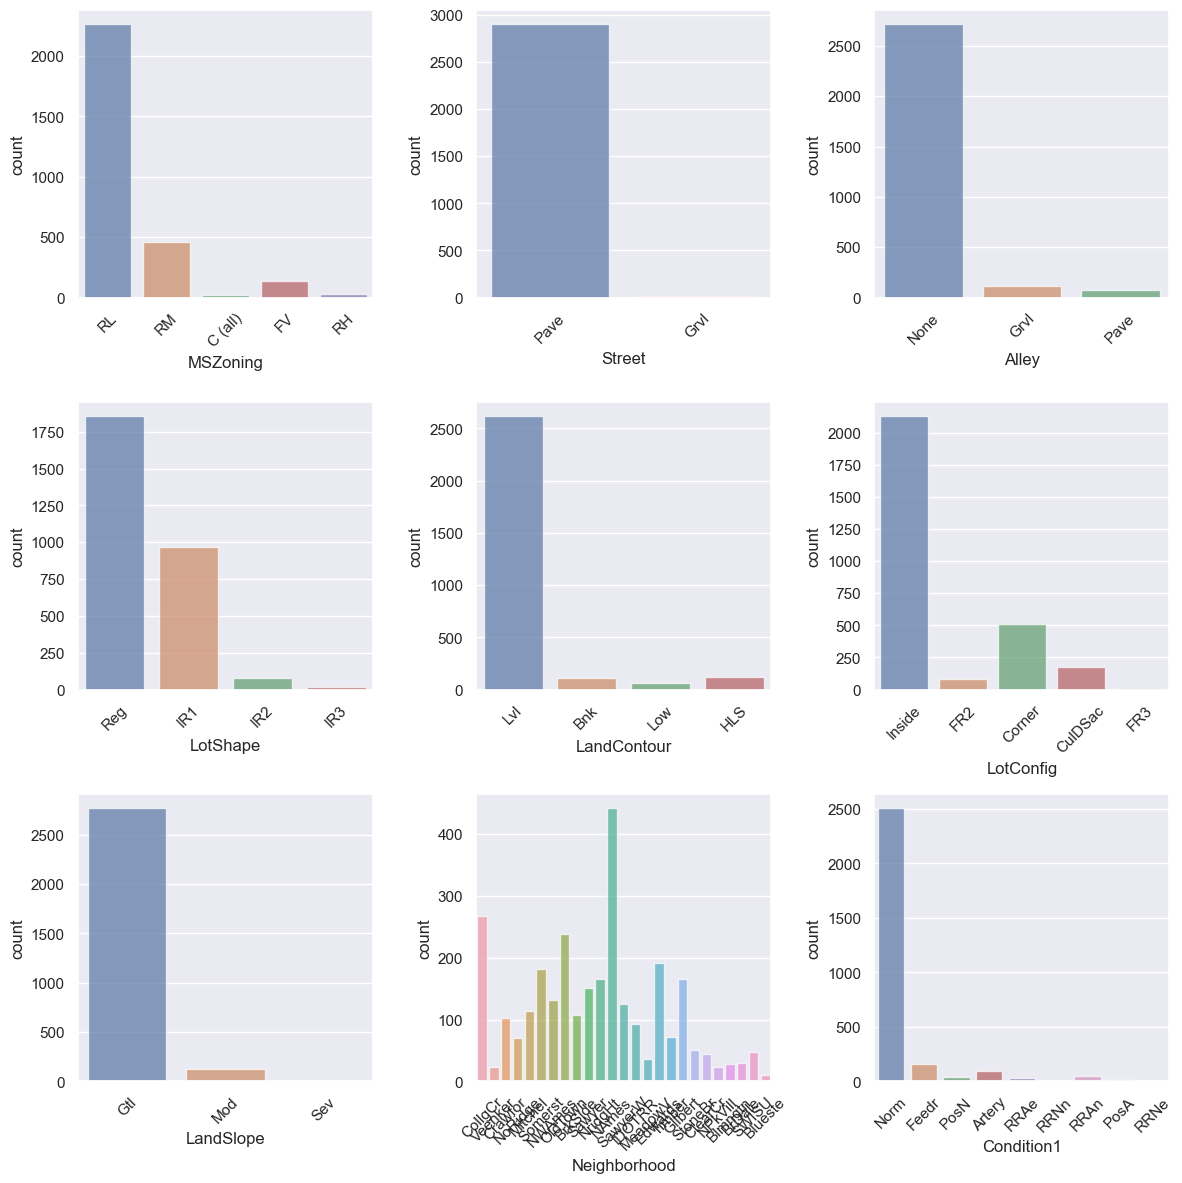

In [416]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(fig.axes):
    if i < 9:  # Plot only the first 9 columns
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=categ_data.columns[i], alpha=0.7, data=categ_data, ax=ax)

fig.tight_layout()

In [417]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2917, 291)

In [418]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 291 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(9), int64(23), uint8(259)
memory usage: 1.4 MB


In [419]:
X_train = all_data[:n_train]
X_test = all_data[n_train:]

## Preizkus modelov
Na učni množici natreniramo modele in jih preizkusimo na testni množici. Iščemo model z najnižjo RMSE.

In [420]:
print(y_train)

      SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1458 rows x 1 columns]


Text(0, 0.5, '')

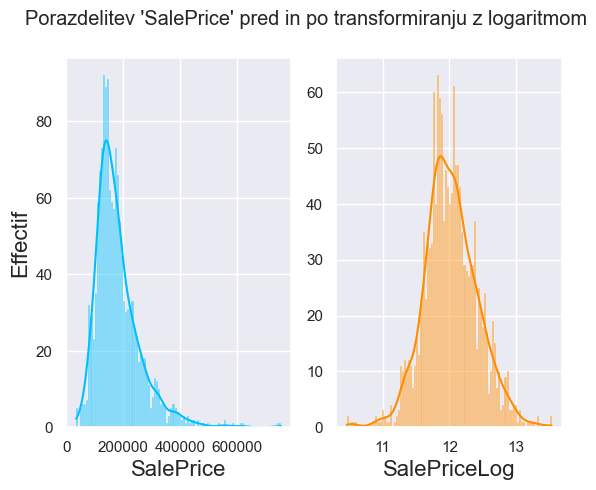

In [421]:
y_train["SalePriceLog"] = np.log(y_train.SalePrice)

fig, axes = plt.subplots(1, 2)
fig.suptitle("Porazdelitev 'SalePrice' pred in po transformiranju z logaritmom")

# before log transformation
p = sns.histplot(ax=axes[0], x=y_train["SalePrice"],
                 kde=True, bins=100, color="deepskyblue")
p.set_xlabel("SalePrice", fontsize=16)
p.set_ylabel("Effectif", fontsize=16)

# after log transformation
q = sns.histplot(ax=axes[1], x=y_train["SalePriceLog"],
                 kde=True, bins=100, color="darkorange")
q.set_xlabel("SalePriceLog", fontsize=16)
q.set_ylabel("", fontsize=16)

In [422]:
y_train = y_train['SalePriceLog']
print(y_train)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePriceLog, Length: 1458, dtype: float64


In [423]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ARDRegression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [424]:
np.random.seed(42)

dummy = DummyRegressor()
linear = LinearRegression()
ard = ARDRegression(compute_score=True, n_iter=30)
bayes = BayesianRidge(compute_score=True, n_iter=30)
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
svr = SVR()
forest = RandomForestRegressor(n_estimators=10)
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

modeli = [dummy, linear, ard, bayes, ridge, lasso, elastic, svr, forest, xgboost, lgbm]

In [425]:
kf=KFold(n_splits=10, shuffle=True, random_state=42)
for model in modeli:
    score=cross_val_score(model,X_train,y_train,cv=kf, scoring='neg_mean_squared_error')
    #print(f"Rezultat prečnega preverjanja za {model} je {score}")
    print(f"Povprečni rezultat prečnega preverjanja za {model} je {np.exp(score.mean())} s standardnim odklonom {np.exp(score.std())}")

Povprečni rezultat prečnega preverjanja za DummyRegressor() je 0.8521273760915171 s standardnim odklonom 1.0192482055240388
Povprečni rezultat prečnega preverjanja za LinearRegression() je 0.9846278234977929 s standardnim odklonom 1.004421605338388
Povprečni rezultat prečnega preverjanja za ARDRegression(compute_score=True, n_iter=30) je 0.9777861630700561 s standardnim odklonom 1.003689681945618
Povprečni rezultat prečnega preverjanja za BayesianRidge(compute_score=True, n_iter=30) je 0.9871898256375176 s standardnim odklonom 1.003372232572385
Povprečni rezultat prečnega preverjanja za Ridge() je 0.9863631435416643 s standardnim odklonom 1.003480704631509
Povprečni rezultat prečnega preverjanja za Lasso(alpha=0.001) je 0.9871059820273821 s standardnim odklonom 1.0034209327176935
Povprečni rezultat prečnega preverjanja za ElasticNet(alpha=0.001) je 0.9874711776457773 s standardnim odklonom 1.0032228756783341
Povprečni rezultat prečnega preverjanja za SVR() je 0.957104452856833 s standa

In [426]:
kf=KFold(n_splits=10, shuffle=True, random_state=42)
for model in modeli:
    score=cross_val_score(model,X_train,y_train,cv=kf, scoring='r2')
    #print(f"Rezultat prečnega preverjanja za {model} je {score}")
    print(f"Povprečni rezultat prečnega preverjanja za {model} je {(score.mean())} s standardnim odklonom {(score.std())}")

Povprečni rezultat prečnega preverjanja za DummyRegressor() je -0.011780038272667336 s standardnim odklonom 0.014799563356945773
Povprečni rezultat prečnega preverjanja za LinearRegression() je 0.9022623349383758 s standardnim odklonom 0.023935448344651885
Povprečni rezultat prečnega preverjanja za ARDRegression(compute_score=True, n_iter=30) je 0.8573531418929854 s standardnim odklonom 0.02016461057447304
Povprečni rezultat prečnega preverjanja za BayesianRidge(compute_score=True, n_iter=30) je 0.9184634460937099 s standardnim odklonom 0.01927345427532724
Povprečni rezultat prečnega preverjanja za Ridge() je 0.9132546500164915 s standardnim odklonom 0.019097857693652614
Povprečni rezultat prečnega preverjanja za Lasso(alpha=0.001) je 0.917693757410724 s standardnim odklonom 0.02033495615424864
Povprečni rezultat prečnega preverjanja za ElasticNet(alpha=0.001) je 0.9201177718095375 s standardnim odklonom 0.018835044496092263
Povprečni rezultat prečnega preverjanja za SVR() je 0.7221861

Najboljši trije modeli: Lasso, ElasticNet in LGBMRegressor. Natrenirajmo jih!

In [427]:
model_lasso = lasso.fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_test)
cene_lasso = np.exp(pred_lasso)

In [428]:
model_elastic = elastic.fit(X_train, y_train)
pred_elastic = model_elastic.predict(X_test)
cene_elastic = np.exp(pred_elastic)

In [429]:
model_lgbm = lgbm.fit(X_train, y_train)
pred_lgbm = model_lgbm.predict(X_test)
cene_lgbm = np.exp(pred_lgbm)

In [430]:
output_lasso = pd.DataFrame({"Id": test_ID,
                       "SalePrice": cene_lasso})
output_lasso.head(10)

,Id,SalePrice
0,1461,116080.354760
1,1462,145392.191213
2,1463,177886.544441
3,1464,202692.602234
4,1465,185929.967925
5,1466,171735.394402
6,1467,189388.768376
7,1468,163706.997887
8,1469,195153.082664
9,1470,117975.255513


In [431]:
output_elastic = pd.DataFrame({"Id": test_ID,
                       "SalePrice": cene_elastic})
output_elastic.head(10)

,Id,SalePrice
0,1461,115491.374210
1,1462,146295.445242
2,1463,178587.708886
3,1464,202282.321231
4,1465,189591.029022
5,1466,171247.139321
6,1467,185913.893076
7,1468,163597.096681
8,1469,195064.365555
9,1470,118843.835032


In [432]:
output_lgbm = pd.DataFrame({"Id": test_ID,
                       "SalePrice": cene_lgbm})
output_lgbm.head(10)

,Id,SalePrice
0,1461,117796.294740
1,1462,153338.444233
2,1463,182868.439062
3,1464,180464.909548
4,1465,182926.043167
5,1466,178020.746952
6,1467,181338.909724
7,1468,169162.063793
8,1469,175102.704193
9,1470,119123.733804


In [433]:
output_lasso.to_csv("submission_lasso.csv", index=False)
output_elastic.to_csv("submission_elastic.csv", index=False)
output_lgbm.to_csv("submission_lgbm.csv", index=False)